<a href="https://colab.research.google.com/github/flavianacif/DSWP/blob/master/RFB_RN_ULTIMAS_TENTATIVAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from tensorflow import keras

[**Python**] - Verificar a versão do Tensorflow
> Assegurar que está a utilizar a versão 2.x.

In [ ]:
tf.__version__

'2.3.0'

[**Python**] - Definir o número de casas decimais

In [2]:
np.set_printoptions(precision= 3)

### 1. Carregar os dados

[**Python**] - Carregar os dados:

In [202]:
# Leitura do dataframe:
df_train = pd.read_csv('/train_6.csv')

In [237]:
df_X = df_train.copy()

In [311]:
df_test = pd.read_csv('/test_6.csv')

In [304]:
df_train.shape

(11033, 128)

In [312]:
df_test.head()

,id,md1,md2,md3,md4,md5,md7,md8,md9,md10,md12,mc1,mc3,mc4,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind12,ind13,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind31,ind32,ind34,ind36,ind37,cnae2_0,cnae2_1,cnae2_2,...,cnae2_60,cnae2_61,cnae2_62,cnae2_63,cnae2_64,cnae2_65,cnae2_66,cnae2_68,cnae2_69,cnae2_70,cnae2_71,cnae2_72,cnae2_73,cnae2_74,cnae2_75,cnae2_77,cnae2_78,cnae2_79,cnae2_80,cnae2_81,cnae2_82,cnae2_85,cnae2_86,cnae2_87,cnae2_90,cnae2_91,cnae2_93,cnae2_94,cnae2_95,cnae2_96,rf2_0,rf2_1,rf2_2,rf2_3,rf2_4,rf2_5,rf2_6,rf2_7,rf2_8,rf2_9
0,3411,2.003680,-0.494787,-0.495820,-0.442070,0.123285,-0.551138,-0.513523,-0.065299,1.010537,-0.488845,-0.691012,-0.677706,0.001520,-0.272616,-0.732025,1.415327,1.391831,-0.833054,-0.712381,-0.810896,-0.577874,-0.598610,-1.536467,-1.553749,0.437683,0.471211,1.586372,1.598694,0.284143,-1.378361,-1.365289,-0.698925,-0.753537,-0.970113,0.607919,-1.389713,-0.012893,-0.087294,-0.049994,...,-0.054779,-0.038706,-0.119351,-0.045628,-0.117548,-0.027359,-0.092003,-0.202279,-0.155474,-0.130995,5.337850,-0.024126,-0.118993,-0.100786,-0.025793,-0.108889,-0.098661,-0.041812,-0.075387,-0.120421,-0.153217,-0.109667,-0.292440,-0.037614,-0.056285,-0.009117,-0.043762,-0.031595,-0.039768,-0.05244,-0.27917,-0.289247,-0.338801,-0.257087,-0.244164,-0.289247,2.648897,-0.228481,-0.290089,-0.654796
1,2177,1.500909,-0.361906,-0.491025,-0.644654,-0.664717,-0.485928,-0.616134,-0.672111,-0.676531,0.008991,2.117592,-0.670669,0.482933,-0.501580,-0.732025,-0.802706,-0.839223,1.286482,1.605530,1.455495,1.737508,1.864395,-1.536467,-1.553749,0.998441,-1.214927,-0.763882,-0.750870,-0.640278,1.036880,1.124830,-0.698925,1.327075,-0.970113,-1.644957,0.719573,-0.012893,-0.087294,-0.049994,...,-0.054779,-0.038706,-0.119351,-0.045628,-0.117548,-0.027359,-0.092003,-0.202279,-0.155474,-0.130995,-0.187341,-0.024126,-0.118993,-0.100786,-0.025793,-0.108889,-0.098661,-0.041812,-0.075387,-0.120421,-0.153217,-0.109667,3.419508,-0.037614,-0.056285,-0.009117,-0.043762,-0.031595,-0.039768,-0.05244,-0.27917,-0.289247,-0.338801,-0.257087,-0.244164,-0.289247,-0.377516,-0.228481,3.447216,-0.654796
2,8400,-0.264478,-0.818245,-0.777297,-0.760530,-0.664717,-0.784815,-0.764148,-0.796796,-0.676531,-0.464045,-0.668474,-0.614676,-0.226717,-0.138354,-0.732025,1.415327,1.391831,1.286482,-0.712381,-0.810896,-0.577874,-0.598610,0.675043,0.664488,-1.244591,-1.214927,1.586372,1.598694,-0.640278,1.036880,1.124830,-0.698925,1.327075,1.030808,0.607919,0.719573,-0.012893,-0.087294,-0.049994,...,-0.054779,-0.038706,-0.119351,-0.045628,-0.117548,-0.027359,-0.092003,-0.202279,-0.155474,-0.130995,-0.187341,-0.024126,-0.118993,-0.100786,-0.025793,-0.108889,-0.098661,-0.041812,-0.075387,-0.120421,-0.153217,-0.109667,-0.292440,-0.037614,-0.056285,-0.009117,-0.043762,-0.031595,-0.039768,-0.05244,-0.27917,-0.289247,-0.338801,-0.257087,-0.244164,-0.289247,-0.377516,-0.228481,-0.290089,1.527193
3,464,2.003680,2.163904,2.152560,2.121936,0.669432,2.194291,2.206491,2.209243,-0.016854,2.080461,1.703231,0.253817,1.936345,-0.663413,-0.732025,-0.802706,-0.839223,-0.833054,0.402534,1.150439,1.737508,0.716358,0.386219,0.489691,0.437683,0.471211,-0.763882,-0.750870,1.999869,-1.042884,-0.120230,-0.698925,-0.753537,-0.970113,-1.644957,-1.389713,-0.012893,-0.087294,-0.049994,...,-0.054779,-0.038706,-0.119351,-0.045628,-0.117548,-0.027359,-0.092003,-0.202279,-0.155474,-0.130995,-0.187341,-0.024126,-0.118993,-0.100786,-0.025793,-0.108889,-0.098661,-0.041812,-0.075387,-0.120421,-0.153217,-0.109667,-0.292440,-0.037614,-0.056285,-0.009117,-0.043762,-0.031595,-0.039768,-0.05244,-0.27917,-0.289247,-0.338801,-0.257087,-0.244164,-0.289247,-0.377516,-0.228481,-0.290089,1.527193
4,6672,1.309214,-0.518234,-0.657630,-0.467367,0.125706,-0.631375,-0.750867,-0.511860,-0.051732,-0.709886,-0.253748,-0.677707,-0.466562,-0.480002,-0.732025,-0.802706,-0.839223,-0.833054,1.095358,0.956663,-0.577874,-0.598610,-1.536467,0.664488,-1.244591,-1.214927,-0.763882,-0.750870,-0.640278,-1.378361,-1.365289,-0.69

[**Python**] - Mostrar as primeiras 5 linhas:

In [95]:
df_train.head()

,id,cnae2,rf2,md1,md2,md3,md4,md5,md7,md8,md9,md10,md12,mc1,mc3,mc4,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind12,ind13,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind31,ind32,ind34,ind36,ind37,target
0,0,86,1,0.015101,0.011256,0.111095,0.003233,0.003233,0.016366,0.021082,0.004541,0.004541,0.130930,0.003945,0.000138,0.003355,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.0976,0.0333,0.1000,0.0,0.0,0.0,1.0,1.0,1
1,1,18,9,0.005996,0.019476,0.124770,0.000000,0.010487,0.029214,0.046445,0.000000,0.018198,0.138620,0.003186,0.003121,0.003355,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0125,0.0286,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.0000,0.4444,0.2222,1.0,0.0,1.0,1.0,0.0,0
2,2,74,9,0.000006,0.002902,0.110160,0.002274,0.002274,0.002902,0.020058,0.003131,0.003131,0.130405,0.000015,0.000050,0.000209,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.0000,1.0000,1.0000,1.0,1.0,1.0,1.0,1.0,0
3,3,49,4,0.000009,0.014526,0.120351,0.000000,0.000000,0.014526,0.032017,0.000000,0.000000,0.138620,0.000438,0.000042,0.000115,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0000,0.0000,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.1785,0.1667,0.1667,0.0,0.0,0.0,0.0,1.0,0
4,4,47,1,0.000191,0.004042,0.111078,0.001121,0.001121,0.006063,0.023705,0.011886,0.011886,0.131285,0.001925,0.003121,0.000719,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0


### Pré-processamento e transformação dos dados

[**Python**] - Normalizar os dados - StandardScaler()

In [239]:
df_y = df_X['target']
df_X = df_X.drop(columns= ['target','id'])


In [313]:
X_test = df_test.drop(columns= ['id'])

In [513]:
df_corr = pd.DataFrame([[0,0]])

In [514]:

for i in df_train.columns:
  corr = abs(pd.to_numeric(df_train[i].corr(df_train['target'])))
  df_corr = df_corr.append(pd.DataFrame([[i,corr]]))
  #print(i,df_train[i].corr(df_train['target']))

In [502]:
df_corr.rename_axis(columns ={'0':'feature','1':'corr'],inplace=True)

In [517]:
df_corr.sort_values(by=1,ascending=False).head(50)

,0,1
0,target,1.000000
0,ind32,0.216891
0,ind06,0.210711
0,ind31,0.209753
0,ind03,0.201608
0,ind34,0.200677
0,mc4,0.191309
0,ind04,0.182885
0,mc1,0.178358
0,ind05,0.171848


In [498]:
df_corr.sort_values(by='1')

KeyError: ignored

### 3. Definir as amostras de treinamento e validação

[**Python**] - Definir as amostras de treinamento e validação

In [421]:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste= train_test_split(df_X, df_y, test_size = 0.1)#, random_state = 22091980) #20111974)
print(f'X: Treinamento=  {X_treinamento.shape}; X: Teste=  {X_teste.shape}')

X: Treinamento=  (9929, 126); X: Teste=  (1104, 126)


In [385]:
print(f'Y: Treinamento =  {y_treinamento.shape}; Y: Teste = {y_teste.shape}')

Y: Treinamento =  (9929,); Y: Teste = (1104,)


### 4. Definir a arquitetura da Rede Neural com _Tensorflow_/_Keras_

[**Python**] - Definir a arquitetura, ou seja:
* $N_{I}$: Número de neurônios na camada de entrada (_Input Layer_);
* $N_{O}$: Número de neurônios na camada de saída (_Output Layer_);
* $N_{H}$: Número de neurônios na camada escondida (_Hidden Layer_);
* FA: Função de ativação;

In [469]:
# Número de Neurônios na Input Layer:
N_I = 126

# Número de neurônios na Output Layer:
N_O = 1

# Número de neurônios na Hidden Layer:
N_H = 100

N_H2 = 100

N_H3=40

N_H4 = 40

# Função de Ativação da Hidden Layer:
#FA_H = tf.nn.leaky_relu
FA_H = tf.keras.activations.swish

# Função de Ativação da Output Layer:
FA_O = tf.keras.activations.sigmoid




[**Python**] - Definir as sementes para NumPy e Tensorflow:
> Por questões de reproducibilidade de resultados, use as sementes abaixo:

* NumPy: 20111974;
* Tensorflow: 20111974;

In [392]:
#np.random.seed(19800922)
#tf.random.set_seed(22091980)


[**Python**] - Definir a Rede Neural:





* 1 camada _dropout_ com $p= 0.1$:

In [473]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

RN= Sequential()
RN.add(Dense(N_H, input_dim= N_I, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.05))
RN.add(Dense(N_H2, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.05))
#RN.add(Dense(N_H3, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
#RN.add(Dropout(0.1))
#RN.add(Dense(N_H4, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
#RN.add(Dropout(0.1))
RN.add(Dense(units= N_O, activation= FA_O))

# Resumo da arquitetura da Rede Neural
print(RN.summary())

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_297 (Dense)            (None, 100)               12700     
_________________________________________________________________
dropout_229 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_298 (Dense)            (None, 100)               10100     
_________________________________________________________________
dropout_230 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_299 (Dense)            (None, 1)                 101       
Total params: 22,901
Trainable params: 22,901
Non-trainable params: 0
_________________________________________________________________
None


### 5. Compilar a Rede Neural

Este é um problema de classificação binária (_Male_ ou _Female_). Portanto, temos:
* optimizer= tf.keras.optimizers.Adam();
* loss=  tf.keras.losses.MeanSquaredError() ou loss= tf.keras.losses.BinaryCrossentropy(). Particularmente, eu gosto de usar loss=  tf.keras.losses.MeanSquaredError() porque o resultado é mais intuitivo;
* metrics= tf.keras.metrics.binary_accuracy.

[**Python**] - Comando modelo.compile(optimizer, loss, metrics):

In [474]:

Algoritmo_Opt = tf.keras.optimizers.Adam()
#Algoritmo_Opt = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.8, beta_2=0.99, epsilon=1e-07 , amsgrad=True,     name='Adam')
Loss_Function = tf.keras.losses.MeanSquaredError()
Metrics_Perf = tf.keras.metrics.binary_accuracy

RN.compile(optimizer = Algoritmo_Opt, loss = Loss_Function, metrics = Metrics_Perf)

### 6. Ajustar a Rede Neural

Obs.: A opção callbacks abaixo implementa o conceito de _early stopping_. Esta opção vai parar o processo de treinamento da Rede Neural antes de atingirmos o númerco de _epochs_ quando o modelo pára de melhorar, medido pela métrica val_loss. O parâmetro _patience_= k significa que o processo de otimização vai parar se tivermos k _epochs_ consecutivas sem observarmos melhoria da performance da Rede Neural.

[**Python**] - Comando modelo.fit(X_treinamento, y_treinamento, epochs)

In [475]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, min_delta = 0.001)]
hist= RN.fit(X_treinamento, y_treinamento, epochs = 100, 
             validation_data = (X_teste, y_teste), 
             callbacks = callbacks)

Epoch 1/100
311/311 [==============================] - 1s 2ms/step - loss: 0.1705 - binary_accuracy: 0.7593 - val_loss: 0.1691 - val_binary_accuracy: 0.7672
Epoch 2/100
311/311 [==============================] - 1s 2ms/step - loss: 0.1597 - binary_accuracy: 0.7713 - val_loss: 0.1643 - val_binary_accuracy: 0.7672
Epoch 3/100
311/311 [==============================] - 1s 2ms/step - loss: 0.1558 - binary_accuracy: 0.7752 - val_loss: 0.1642 - val_binary_accuracy: 0.7717
Epoch 4/100
311/311 [==============================] - 1s 2ms/step - loss: 0.1530 - binary_accuracy: 0.7755 - val_loss: 0.1616 - val_binary_accuracy: 0.7772
Epoch 5/100
311/311 [==============================] - 1s 2ms/step - loss: 0.1506 - binary_accuracy: 0.7825 - val_loss: 0.1624 - val_binary_accuracy: 0.7663
Epoch 6/100
311/311 [==============================] - 1s 2ms/step - loss: 0.1482 - binary_accuracy: 0.7828 - val_loss: 0.1663 - val_binary_accuracy: 0.7645
Epoch 7/100
311/311 [==============================] - 1s 

In [383]:
RN.weights

[<tf.Variable 'dense_199/kernel:0' shape=(126, 200) dtype=float32, numpy=
 array([[-0.109,  0.178, -0.126, ..., -0.059,  0.032,  0.136],
        [-0.092,  0.097, -0.124, ...,  0.003, -0.112,  0.075],
        [ 0.102, -0.03 ,  0.079, ...,  0.048,  0.035,  0.142],
        ...,
        [-0.086,  0.064,  0.067, ..., -0.115,  0.152, -0.141],
        [-0.028,  0.066, -0.115, ..., -0.086,  0.042,  0.068],
        [ 0.057,  0.184, -0.111, ...,  0.057, -0.158, -0.257]],
       dtype=float32)>,
 <tf.Variable 'dense_199/bias:0' shape=(200,) dtype=float32, numpy=
 array([-0.093, -0.115, -0.084,  0.003, -0.107, -0.072, -0.093, -0.036,
        -0.055, -0.082, -0.07 , -0.12 , -0.1  , -0.07 , -0.041, -0.09 ,
        -0.169, -0.159, -0.072, -0.111, -0.088, -0.015, -0.014, -0.107,
        -0.142, -0.029, -0.167, -0.027, -0.148, -0.098, -0.148, -0.087,
        -0.005, -0.073, -0.135, -0.042, -0.038, -0.094, -0.008, -0.032,
        -0.04 , -0.084, -0.063, -0.109, -0.124, -0.009, -0.186, -0.044,
        -0

In [377]:
def Model_Loss(hist):
    print(hist.history.keys())
    plt.plot(hist.history('loss'))
    plt.plot(hist.history('val_loss'))
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'], loc= 'upper right')
    plt.show()

def Model_Accuracy(hist):
    print(hist.history.keys())
    plt.plot(hist.history('accuracy'))
    plt.plot(hist.history('val_accuracy'))
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'], loc= 'upper right')
    plt.show()

def Model_MSE(hist):
    print(hist.history.keys())
    plt.plot(hist.history('mse'))
    plt.plot(hist.history('val_mse'))
    plt.title('Model MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'], loc= 'upper right')
    plt.show()

def Mostra_ConfusionMatrix():
    y_pred = RN.predict_classes(X_teste)
    mc = confusion_matrix(y_teste, y_pred)
    #sns.heatmap(mc,annot=True, annot_kws={"size": 10},fmt="d")
    sns.heatmap(mc/np.sum(mc), annot=True, annot_kws={"size": 10}, fmt='.2%', cmap='Blues')

In [378]:
Model_Accuracy(hist)
hist.history()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


TypeError: ignored

In [ ]:
Model_Loss(hist)

NameError: ignored

### 7. Avaliar a performance da Rede Neural

Para avaliar a a Rede Neural, simplesmente informamos as amostras de teste: X_teste e y_teste. A função evaluate() vai retornar uma lista contendo 2 valores: loss e accuracy.

[**Python**] - Comando modelo.evaluate(X_teste, y_teste)

In [370]:
RN.evaluate(X_teste, y_teste)

35/35 [==============================] - 0s 1ms/step - loss: 0.1648 - binary_accuracy: 0.7572


[0.16479942202568054, 0.7572463750839233]

In [371]:
RN.evaluate(df_X, df_y)

345/345 [==============================] - 0s 1ms/step - loss: 0.1276 - binary_accuracy: 0.8214


[0.12761256098747253, 0.8214447498321533]

In [372]:
RN.evaluate(X_treinamento, y_treinamento)

311/311 [==============================] - 0s 1ms/step - loss: 0.1235 - binary_accuracy: 0.8286


[0.12347785383462906, 0.8285829424858093]

In [364]:
hist.params 

{'epochs': 100, 'steps': 311, 'verbose': 1}

A seguir, a matriz de confusão:

In [375]:
def Mostra_ConfusionMatrix():
    y_pred = RN.predict_classes(X_teste)
    mc = confusion_matrix(y_teste, y_pred)
    #sns.heatmap(mc,annot=True, annot_kws={"size": 10},fmt="d")
    sns.heatmap(mc/np.sum(mc), annot=True, annot_kws={"size": 10}, fmt='.2%', cmap='Blues')

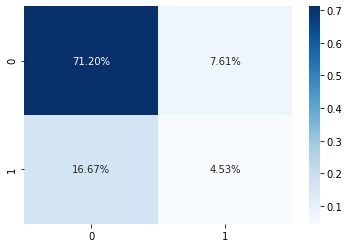

In [376]:
Mostra_ConfusionMatrix()

### 8. _Fine tuning_ da Rede Neural

Para aumentar a acurácia da Rede Neural, sugiro aumentarmos o número de neurônios na _Hidden Layer_ e/ou aumentar o número de _Hidden Layers_.

No entanto, obtivemos uma acurácia razoável com a Rede Neural _baseline_. Portanto, deixo como exercício para os alunos o desafio de melhorar a acurácia desta Rede Neural.

### 9. Fazer Predições com a Rede Neural

[**Python**] - Comando:
* RN.predict_classes(X_treinamento);
* RN.predict_classes(X_teste).

In [353]:
y_test = RN.predict_classes(X_test)

df_submit = pd.concat([df_test['id'],pd.DataFrame(y_test,columns=['target']).astype('boolean')],axis=1)

df_submit.to_csv('/PyLadies_NL_12.csv',index = False, sep = ',')

In [355]:
df_submit['target'].value_counts()

False    861
True     139
Name: target, dtype: Int64

### 10. Conclusões

Desenvolvemos uma Rede Neural capaz de identificar Sexo (_Gender_) com acurácia= 0.9120.

### Salvar a Rede Neural

In [354]:
# Save the weights
RN.save('/RN_12.h5')